In [30]:
import numpy as np
import pandas as pd
import nptdms
from nptdms import TdmsFile
from scipy import signal
from peakutils.peak import indexes
from scipy.signal import bessel

import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
huge_spon = '00_Nac1p_5_huge spons.tdms'
spon = '00_Nac1p_9_spons.tdms'

In [40]:
def read_tdms(file_name):
    """This function reads in a color plot tdms file from Demon Voltammetry export options and returns the 
    color plot as a 2-D Numpy Array with background subtracted. The background is the first CV.

    X-axis of array is time, Y-axis is an individual command voltage recording.

    Keyword Arg is the tdms file that you wish to analyze. 
    """

    import nptdms
    from nptdms import TdmsFile

    # Access file as object
    tdms_file = TdmsFile(file_name)
    root_object = tdms_file.object()

    # extracting the number of collections in a recording from the tdms file properties
    num_collections = (root_object.property("Collection Duration (s)")*root_object.property("Collection Frequency (Hz)"))
    num_collections


    # Initializing list
    color_plot_lists = []


    # Populating the color plot lists with all of the collections from the recording
    for i in range(0,int(num_collections)):
        command_voltage = tdms_file.object('Data1', '%s' %i)
        command_voltage = command_voltage.data
        color_plot_lists.append(command_voltage)


    # Transforming the list of lists into a NumPy 2-D array and transposing it so time is the x-axis
    color_plot_array = np.array(color_plot_lists).transpose()
    # Check to make sure that the first column is a CV
    #plt.plot(color_plot_array[:,0])

    
    # Perform background subtraction
    back_sub_array = []
    initial_cv = color_plot_array[:,0]
    
    for column in color_plot_array.transpose():
        back_sub_array.append(column - initial_cv)
        
    color_plot_array = np.array(back_sub_array).transpose()
    
    
    # Apply Butterworth Filter
    b,a = signal.butter(4, 0.03, analog=False)
    butter = []
    for column in color_plot.transpose():
        filtered = signal.filtfilt(b, a, column)
        butter.append(signal.filtfilt(b, a, column))
    final_color_plot_array = np.array(butter).transpose()
    
    return final_color_plot_array

In [41]:
color_plot = read_tdms(huge_spon)  

C:\Users\dmhedges\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


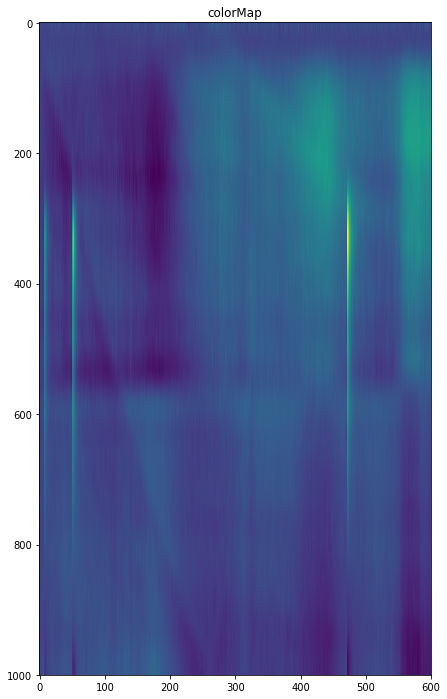

In [57]:
H = color_plot

fig = plt.figure(figsize=(18,12))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

#plt.colorbar(orientation='vertical')
plt.show()

# 2D Image Peak Finder

In [43]:
from PIL import Image
import numpy as np
from scipy.ndimage.filters import maximum_filter
import pylab

In [44]:
color_plot.shape

(1000, 600)

In [46]:
maxima = (color_plot == maximum_filter(color_plot,10))

In [47]:
maxima


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [48]:
import numpy as np
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import matplotlib.pyplot as plt

In [65]:
neighborhood_size = 5
threshold = 5

In [66]:
data_max = filters.maximum_filter(color_plot, neighborhood_size)
maxima = (color_plot == data_max)
data_min = filters.minimum_filter(color_plot, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

In [67]:
labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)
x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)

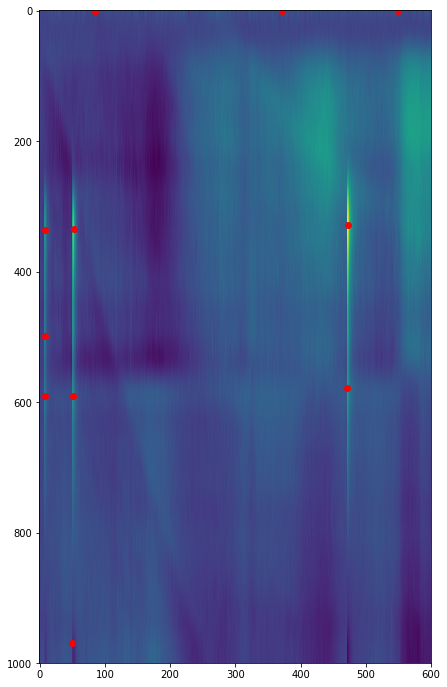

In [68]:
fig = plt.figure(figsize=(18,12))
plt.imshow(color_plot)
#plt.savefig('/tmp/data.png', bbox_inches = 'tight')

#plt.autoscale(False)
plt.plot(x,y, 'ro')
#plt.savefig('/tmp/result.png', bbox_inches = 'tight')